### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import pylab as pl
from sklearn import linear_model
from sklearn.metrics import r2_score



In [2]:
!wget -nc -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv


File ‘FuelConsumption.csv’ already there; not retrieving.


### Read the data

In [3]:
df = pd.read_csv('./FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


array([[<AxesSubplot:title={'center':'CYLINDERS'}>,
        <AxesSubplot:title={'center':'ENGINESIZE'}>],
       [<AxesSubplot:title={'center':'CO2EMISSIONS'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>]],
      dtype=object)

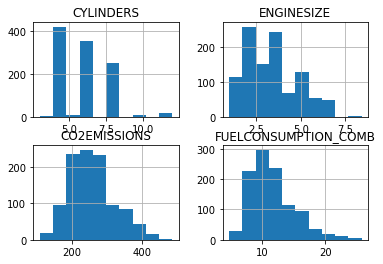

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()

Text(0, 0.5, 'Emission')

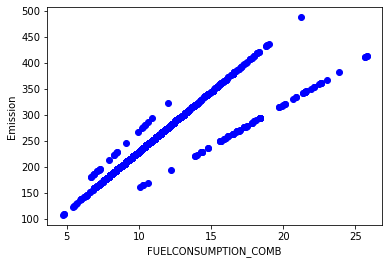

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

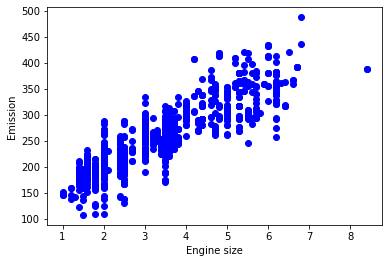

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'EMISSIONS')

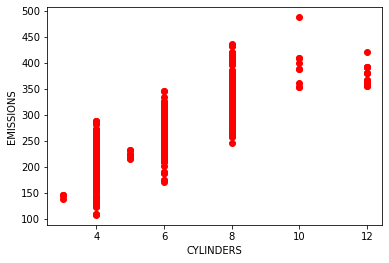

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color= 'red')
plt.xlabel("CYLINDERS")
plt.ylabel("EMISSIONS")

## Create Train and Test dataset  

- we are going to split our dataset into Train and Test sets.
    - $ \%{80} $ for Train
    - $ \%{20} $ for Test

- to split our data randomly in desired portions we should do these steps:
    1. create a mask:
        - to get random values in range 0~1 len(all_data) times:
            - np.random.rand(all_data) 
        - then we should select 80% of them randomly so
            - mask = np.random.rand(all_data) < 0.8
            - since around 80% if the data is below 0.8 its almost make 80% of them True and others False

    2. create our Train set:
        - train = all_data[mask]

    3. create our Test set:
        - test = all_data[~mask]
    


In [10]:
mask = np.random.rand(len(df)) < .8
train = df[mask]
test = df[~mask]

print(f'our train data is {(len(train) / len(df)) * 100 :.4f}\uFF05')
print(f'our test data is {(len(test) / len(df)) * 100 :.4f}\uFF05')

our train data is 79.6626％
our test data is 20.3374％


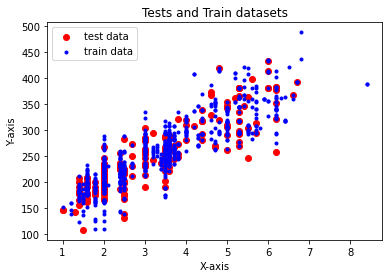

In [11]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, label='test data', color='red', marker='o')
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, label='train data', color='blue', marker='.')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.title('Tests and Train datasets')
plt.legend()

### Modeling
Using sklearn package to model data:


In [12]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.94040306]]
Intercept:  [126.42792783]


### use the formula to plot the model line
$ Y_{i} = \beta_{0} + \beta_{1}X_{i} $  
$ \beta_{0} = Intercept $  
$ \beta_{1} = Slope(Coefficient) $

#### $ Y = Regression.intercept + XRegression.Coefficient $


Text(0, 0.5, 'Emission')

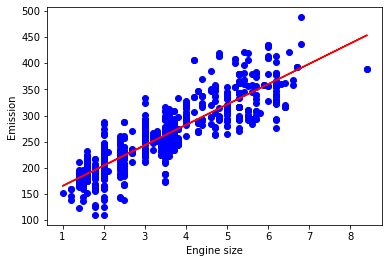

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation

In [14]:

test_x = np.asanyarray(test[['ENGINESIZE']])        # value of X where x is in test set
test_y = np.asanyarray(test[['CO2EMISSIONS']])      # real value of Y for X  where x is in test set
test_y_ = regr.predict(test_x)                      # predicted value of Y for X based on model that learned on train set

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.59
Residual sum of squares (MSE): 1019.95
R2-score: 0.75


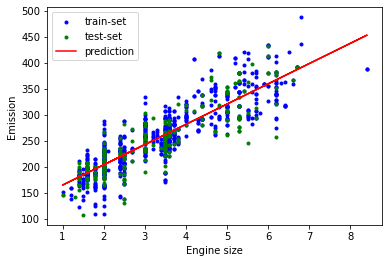

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue', marker='.', label='train-set')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='green', marker='.', label='test-set')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label='prediction')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.legend()